**Se importa las librerias y/o paquetes necesarios para codificar los procesos**

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import pandas as pd
import matplotlib.pyplot as plt
from difflib import SequenceMatcher as SM
from datetime import date
from datetime import datetime
import unicodedata
import numpy as np
import collections

**Realizamos la autentificación para poder acceder a los archivos almacenados en Google Drive**

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Obtenemos el link del archivo csv, lo abrimos y se almacena en un dataframe**

In [ ]:
df = pd.DataFrame()
def _loadCsv():
  global df
  id = '1vPVmPr3-VP7xc8GkC5UvwRJG8Vhtv8BK'
  downloaded = drive.CreateFile({'id':id}) 
  downloaded.GetContentFile('heart900.csv')
  df = pd.read_csv('heart900.csv')
_loadCsv()
df.shape

(918, 12)

**Gráficas de la exploración de datos**

In [ ]:
print('El archivo tiene el siguiente número de filas y columnas:', df.shape)
print('Las columnas son:', df.columns)

El archivo tiene el siguiente número de filas y columnas: (918, 12)
Las columnas son: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Trasformar datos

In [ ]:
df.loc[df.Sex == "F", 'Sex'] = 0
df.loc[df.Sex == "M", 'Sex'] = 1

df.loc[df.ChestPainType == "ASY", 'ChestPainType'] = 0
df.loc[df.ChestPainType == "ATA", 'ChestPainType'] = 1
df.loc[df.ChestPainType == "NAP", 'ChestPainType'] = 2
df.loc[df.ChestPainType == "TA", 'ChestPainType'] = 3

df.loc[df.RestingECG == "LVH", 'RestingECG'] = 0
df.loc[df.RestingECG == "Normal", 'RestingECG'] = 1
df.loc[df.RestingECG == "ST", 'RestingECG'] = 2

df.loc[df.ExerciseAngina == "N", 'ExerciseAngina'] = 0
df.loc[df.ExerciseAngina == "Y", 'ExerciseAngina'] = 1

df.loc[df.ST_Slope == "Down", 'ST_Slope'] = 0
df.loc[df.ST_Slope == "Flat", 'ST_Slope'] = 1
df.loc[df.ST_Slope == "Up", 'ST_Slope'] = 2

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


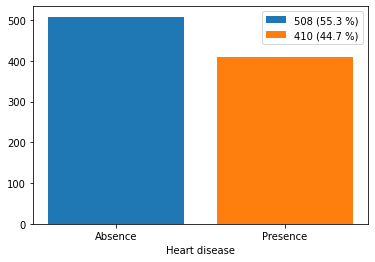

1    508
0    410
Name: HeartDisease, dtype: int64


In [ ]:
result = df.HeartDisease
count = result.count()
absence, presence = result.value_counts()

porc_a = str(absence) + " (" + str(round(absence * 100 / count, 1)) + " %)" 
porc_p = str(presence) + " (" + str(round(presence * 100 / count, 1)) + " %)"

plt.bar('Absence', absence)
plt.bar('Presence', presence)

plt.legend([porc_a, porc_p])
plt.xlabel('Heart disease')
plt.show()

print(result.value_counts())

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


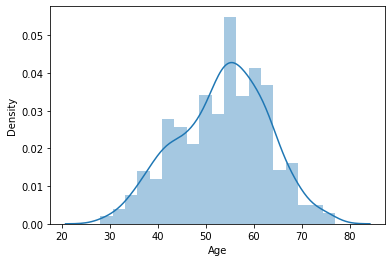

In [ ]:
import seaborn as sns
sns.distplot(df['Age'])

1    725
0    193
Name: Sex, dtype: int64


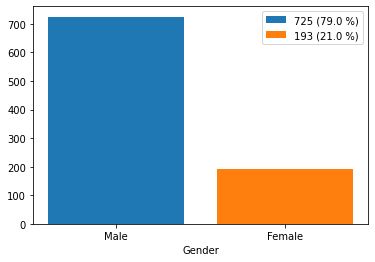

In [ ]:
result = df.Sex
count = result.count()
result = result.value_counts()
print(result)
y = result[1]
n = result[0]

porc_y = str(y) + " (" + str(round(y * 100 / count, 1)) + " %)" 
porc_n = str(n) + " (" + str(round(n * 100 / count, 1)) + " %)"

plt.bar('Male', y)
plt.bar('Female', n)

plt.legend([porc_y, porc_n])
plt.xlabel('Gender')
plt.show()

0    496
2    203
1    173
3     46
Name: ChestPainType, dtype: int64


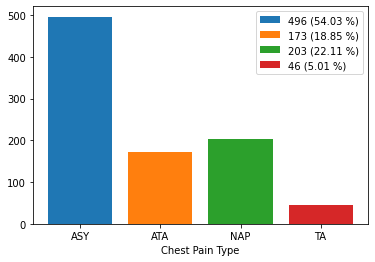

In [ ]:
result = df.ChestPainType
count = result.count()
result = result.value_counts()
print(result)
ASY = result[0]
ATA = result[1]
NAP = result[2]
TA = result[3]

porc_ASY = str(ASY) + " (" + str(round(ASY * 100 / count, 2)) + " %)" 
porc_ATA = str(ATA) + " (" + str(round(ATA * 100 / count, 2)) + " %)"
porc_NAP = str(NAP) + " (" + str(round(NAP * 100 / count, 2)) + " %)"
porc_TA = str(TA) + " (" + str(round(TA * 100 / count, 2)) + " %)"

plt.bar('ASY', ASY)
plt.bar('ATA', ATA)
plt.bar('NAP', NAP)
plt.bar('TA', TA)

plt.legend([porc_ASY, porc_ATA, porc_NAP, porc_TA])
plt.xlabel('Chest Pain Type')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


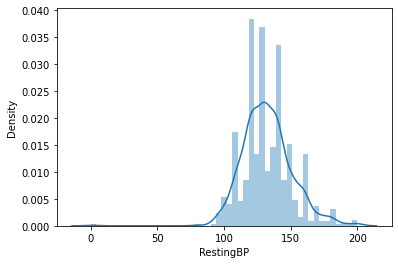

In [ ]:
sns.distplot(df['RestingBP'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


0      172
254     11
223     10
220     10
230      9
      ... 
355      1
354      1
353      1
349      1
603      1
Name: Cholesterol, Length: 222, dtype: int64


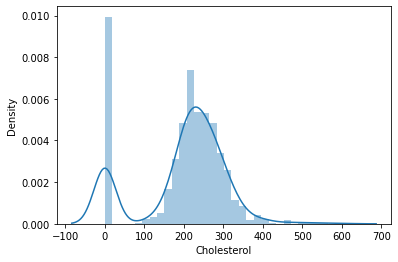

In [ ]:
sns.distplot(df['Cholesterol'])
result = df.Cholesterol
print(result.value_counts())

0    704
1    214
Name: FastingBS, dtype: int64


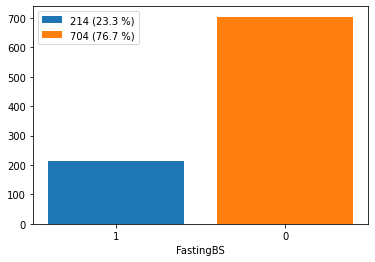

In [ ]:
result = df.FastingBS
count = result.count()
result = result.value_counts()
print(result)
y = result[1]
n = result[0]

porc_y = str(y) + " (" + str(round(y * 100 / count, 1)) + " %)" 
porc_n = str(n) + " (" + str(round(n * 100 / count, 1)) + " %)"

plt.bar('1', y)
plt.bar('0', n)

plt.legend([porc_y, porc_n])
plt.xlabel('FastingBS')
plt.show()

1    552
0    188
2    178
Name: RestingECG, dtype: int64


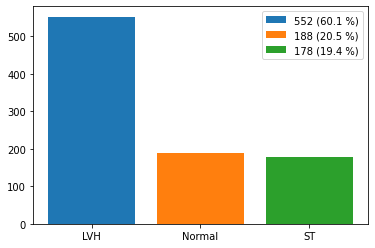

In [ ]:
result = df.RestingECG
count = result.count()
result = result.value_counts()
print(result)

n = result[0]
y = result[1]
z = result[2]

porc_y = str(y) + " (" + str(round(y * 100 / count, 1)) + " %)" 
porc_n = str(n) + " (" + str(round(n * 100 / count, 1)) + " %)"
porc_z = str(z) + " (" + str(round(z * 100 / count, 1)) + " %)"

plt.bar('LVH', y)
plt.bar('Normal', n)
plt.bar('ST', z)

plt.legend([porc_y, porc_n, porc_z])
plt.show()

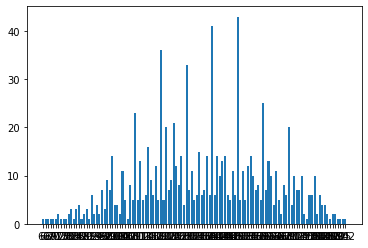

In [ ]:
result = df.MaxHR
count = result.count()
result = result.value_counts()
result = result.to_dict()
result = dict(sorted(result.items()))
plt.bar(range(len(result)),list(result.values()), tick_label=list(result.keys()))  
plt.ylabel('')
plt.show() 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


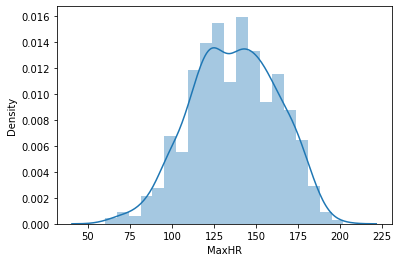

In [ ]:
sns.distplot(df['MaxHR'])

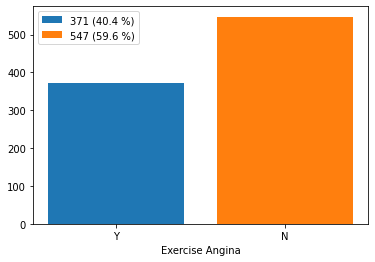

In [ ]:
result = df.ExerciseAngina
count = result.count()
result = result.value_counts()
y = result[1]
n = result[0]

porc_y = str(y) + " (" + str(round(y * 100 / count, 1)) + " %)" 
porc_n = str(n) + " (" + str(round(n * 100 / count, 1)) + " %)"

plt.bar('Y', y)
plt.bar('N', n)

plt.legend([porc_y, porc_n])
plt.xlabel('Exercise Angina')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


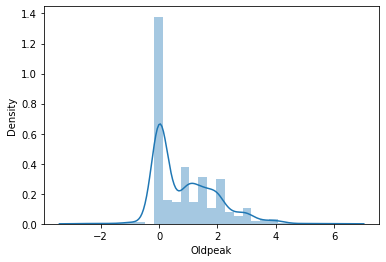

In [ ]:
sns.distplot(df['Oldpeak'])

1    460
2    395
0     63
Name: ST_Slope, dtype: int64
460
395
63


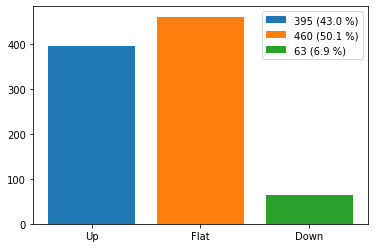

In [ ]:
result = df.ST_Slope
count = result.count()
n, y, z = result.value_counts()
print(result.value_counts())
print(n)
print(y)
print(z)

porc_y = str(y) + " (" + str(round(y * 100 / count, 1)) + " %)" 
porc_n = str(n) + " (" + str(round(n * 100 / count, 1)) + " %)"
porc_z = str(z) + " (" + str(round(z * 100 / count, 1)) + " %)"

plt.bar('Up', y)
plt.bar('Flat', n)
plt.bar('Down', z)

plt.legend([porc_y, porc_n, porc_z])
plt.show()

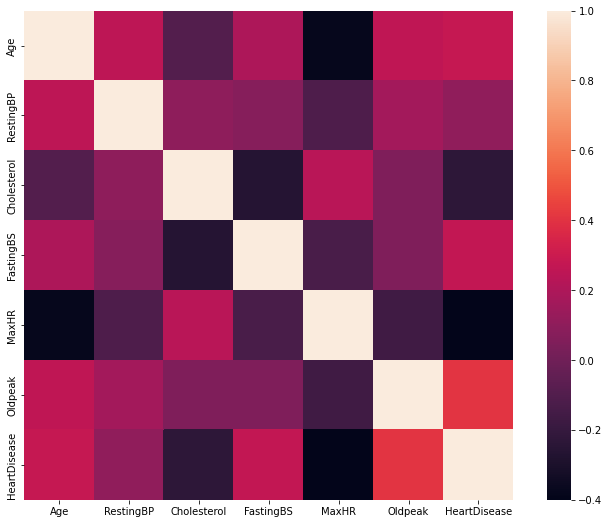

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);